In [1]:
# 셀마다 컨셉을 명확하게 작성하는 것이 중요
# 무엇을 하는 구간인지를 알려줘야 한다
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from multiclass_functions_1_Lecture_Note import * # 함수들을 다 가지고 와라!

import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

Mounted at /content/drive
cpu


In [ ]:
#Hyper parameter
BATCH_SIZE = 32
LR = 1e-3
EPOCH = 5
criterion = nn.CrossEntropyLoss()
new_model_train = True # 새 모델을 학습할것인지에 대한 여부
model_type = "MLP"
dataset ="MNIST"
save_model_path = f"/content/drive/MyDrive/Colab Notebooks/resultsByMe/{model_type}_{dataset}.pt"

In [ ]:
# DS 가지고 오기
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=False, download=True, transform=transform)
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(nn.Linear(28*28, 100), # 28 x 28 행렬의 input data (하나하나를 모두 픽셀로)
                                     nn.ReLU(),
                                     nn.Linear(100,10)) # 0 - 9 까지의 확률을 출력해야 하니까 (출력해야 하는 값 종류 생각하기)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.linear(x)
        return x

In [ ]:
# def Train(model, train_DL, criterion, optimizer):
#     loss_history = []
#     NoT = len(train_DL.dataset)

#     model.train() # train mode로 변경

#     for ep in range(EPOCH):
#         rloss = 0 # running loss
#         for x_batch, y_batch in train_DL:
#             # GPU 메모리로 올려주기 위해 to(DEVICE) 명시하기
#             x_batch = x_batch.to(DEVICE)
#             y_batch = y_batch.to(DEVICE)
#             # inference
#             y_hat = model(x_batch)
#             # loss
#             loss = criterion(y_hat, y_batch)
#             # update - 여러번 반복하면서 고인 곳으로 이동하게 만든다
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             # loss accumulation (loss는 현재 평균을 냈기 때문에 x_batch.shape[0] - 개수를 곱하는 것임)
#             # batch_size로 하지 않는 이유 - drop_last 관련, 즉 마지막 국자를 생각해야 한다
#             loss_b = loss.item() * x_batch.shape[0]
#             rloss += loss_b

#         # print loss
#         loss_e = rloss / NoT
#         loss_history += [loss_e]
#         print(f"Epoch: {ep+1}, train loss : {round(loss_e, 3)}")
#         print("-" * 20)
#     return loss_history

# def Test(model, test_DL):
#     model.eval()
#     with torch.no_grad():
#         r_correct = 0
#         for x_batch, y_batch in test_DL:
#             x_batch = x_batch.to(DEVICE)
#             y_batch = y_batch.to(DEVICE)
#             # inference
#             y_hat = model(x_batch)
#             # Accuracy Accumulation
#             pred = y_hat.argmax(dim=1)
#             # Model의 예측 - pred / y_batch 실제 정답지
#             # 예측과 실제 정답지 사이를 비교해야 한다는 뜻이 되겠다
#             corrects_b = torch.sum(pred == y_batch).item()
#             r_correct += corrects_b

#         accuracy_e = r_correct / len(test_DL.dataset) * 100
#     print(f"Test accuracy: {r_correct}/{len(test_DL.dataset)} ({round(accuracy_e,1)} %)")

# def Test_plot(model, test_DL):
#     model.eval()
#     with torch.no_grad():
#         x_batch, y_batch = next(iter(test_DL))
#         x_batch = x_batch.to(DEVICE)
#         y_hat = model(x_batch)
#         pred = y_hat.argmax(dim=1)

#     x_batch = x_batch.to("cpu")

#     plt.figure(figsize=(8,4))
#     for idx in range(6):
#         plt.subplot(2,3, idx+1, xticks=[], yticks=[]) # ticks 구간을 빈 공간 - 옆에 수치, 눈금을 제거함
#         plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap="gray") # 행열채로 변경하기 위함
#         pred_class = test_DL.dataset.classes[pred[idx]]
#         true_class = test_DL.dataset.classes[y_batch[idx]]
#         plt.title(f"{pred_class} ({true_class})", color = "g" if pred_class==true_class else "r")

# # 파라미터 수 구하기
# def count_params(model):
#     num = sum([p.numel() for p in model.parameters() if p.requires_grad])
#     return num

In [ ]:
# 모델을 올바르게 구축했는지 확인
exec(f"model = {model_type}().to(DEVICE)")
print(model)
x_batch, _ = next(iter(train_DL))
print(model(x_batch.to(DEVICE)).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


Epoch: 1, train loss : 0.315
--------------------
Epoch: 2, train loss : 0.141
--------------------
Epoch: 3, train loss : 0.098
--------------------
Epoch: 4, train loss : 0.076
--------------------
Epoch: 5, train loss : 0.06
--------------------


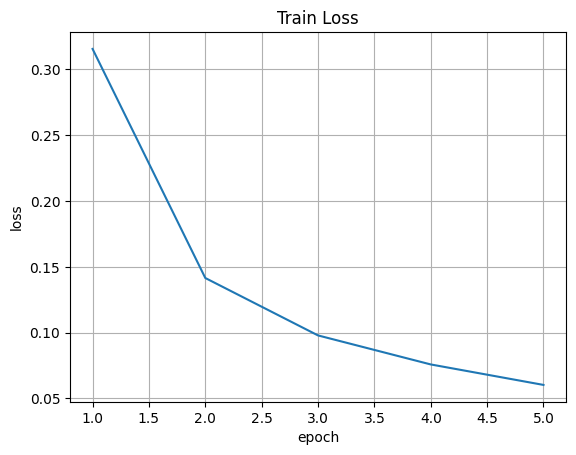

In [ ]:
if new_model_train:
    optimizer = optim.Adam(model.parameters(), lr=LR) # optimizer 모델 위치 주의하기
    loss_history = Train(model, train_DL, criterion, optimizer, EPOCH)

    torch.save(model, save_model_path) # model or model.state_dict() 2가지 방식 존재한다

    plt.plot(range(1, EPOCH+1), loss_history)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Train Loss')
    plt.grid()

In [ ]:
load_model = torch.load(save_model_path, map_location = DEVICE)

In [ ]:
Test(load_model, test_DL)
print(count_params(load_model))

Test accuracy: 9764/10000 (97.6 %)
79510


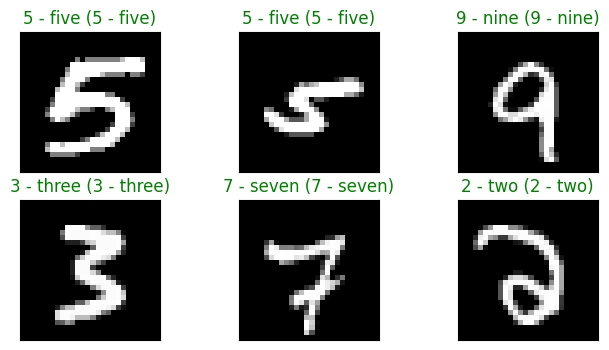

In [ ]:
Test_plot(load_model, test_DL)